In [15]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore") 
# sns.set_style("darkgrid", {"grid.color": ".6", 
#                            "grid.linestyle": ":"})
 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error 
# from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/Users/thutranghoa/Code/Data_analysis/Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## What are they ? Why are they chosen

- Pregnancies : Số lần mang thai. Khi mang thai, nội tiết tố thay đổi, cân nặng tăng. Điều này khiến cho các tế bào cơ thể sử dụng isulin ít hiệu quả hơn, dễ gây ra tiểu đường\
- Glucose : chỉ số glucose (đường) trong huyết tương. Khi bị tiểu đường, cơ thể ko thể tạo ra đủ lượng isulin. Trong khi isulin giúp chuyển glucose từ máu đến các tế bào. Lượng glucose trong máu cao là dấu hiệu của tiểu đường  \
- BloodPressure : huyết áp. Người tăng huyết áp dễ bị thiếu hụt isulin, nguy cơ của bệnh tiểu đường\
- SkinThickness : độ dày của da, độ dày của da bị ảnh hưởng bởi lượng isulin trong cơ thể\
- Isulin : chỉ số isulin. Isulin đóng vai trò trong việc chuyển hoá đường thành năng lượng cho các tế bào \
- BMI : chỉ số khối cơ thể, được tính dựa trên tỉ lệ cân nặng và chiều cao bình phương. Chỉ số BMI cao dẫn tới béo phì, thừa đường và ;à nguyên nhân gây tiểu đường \
- DiabetesPedigreeFunction : chức năng phả hệ bệnh tiểu đường. Hàm này sẽ tính khả năng mắc bệnh tiểu đường dựa trên lịch sử mắc bệnh của gia đình. 
- Age : tuổi, tuổi cao dễ mắc tiểu đường
- Outcome 



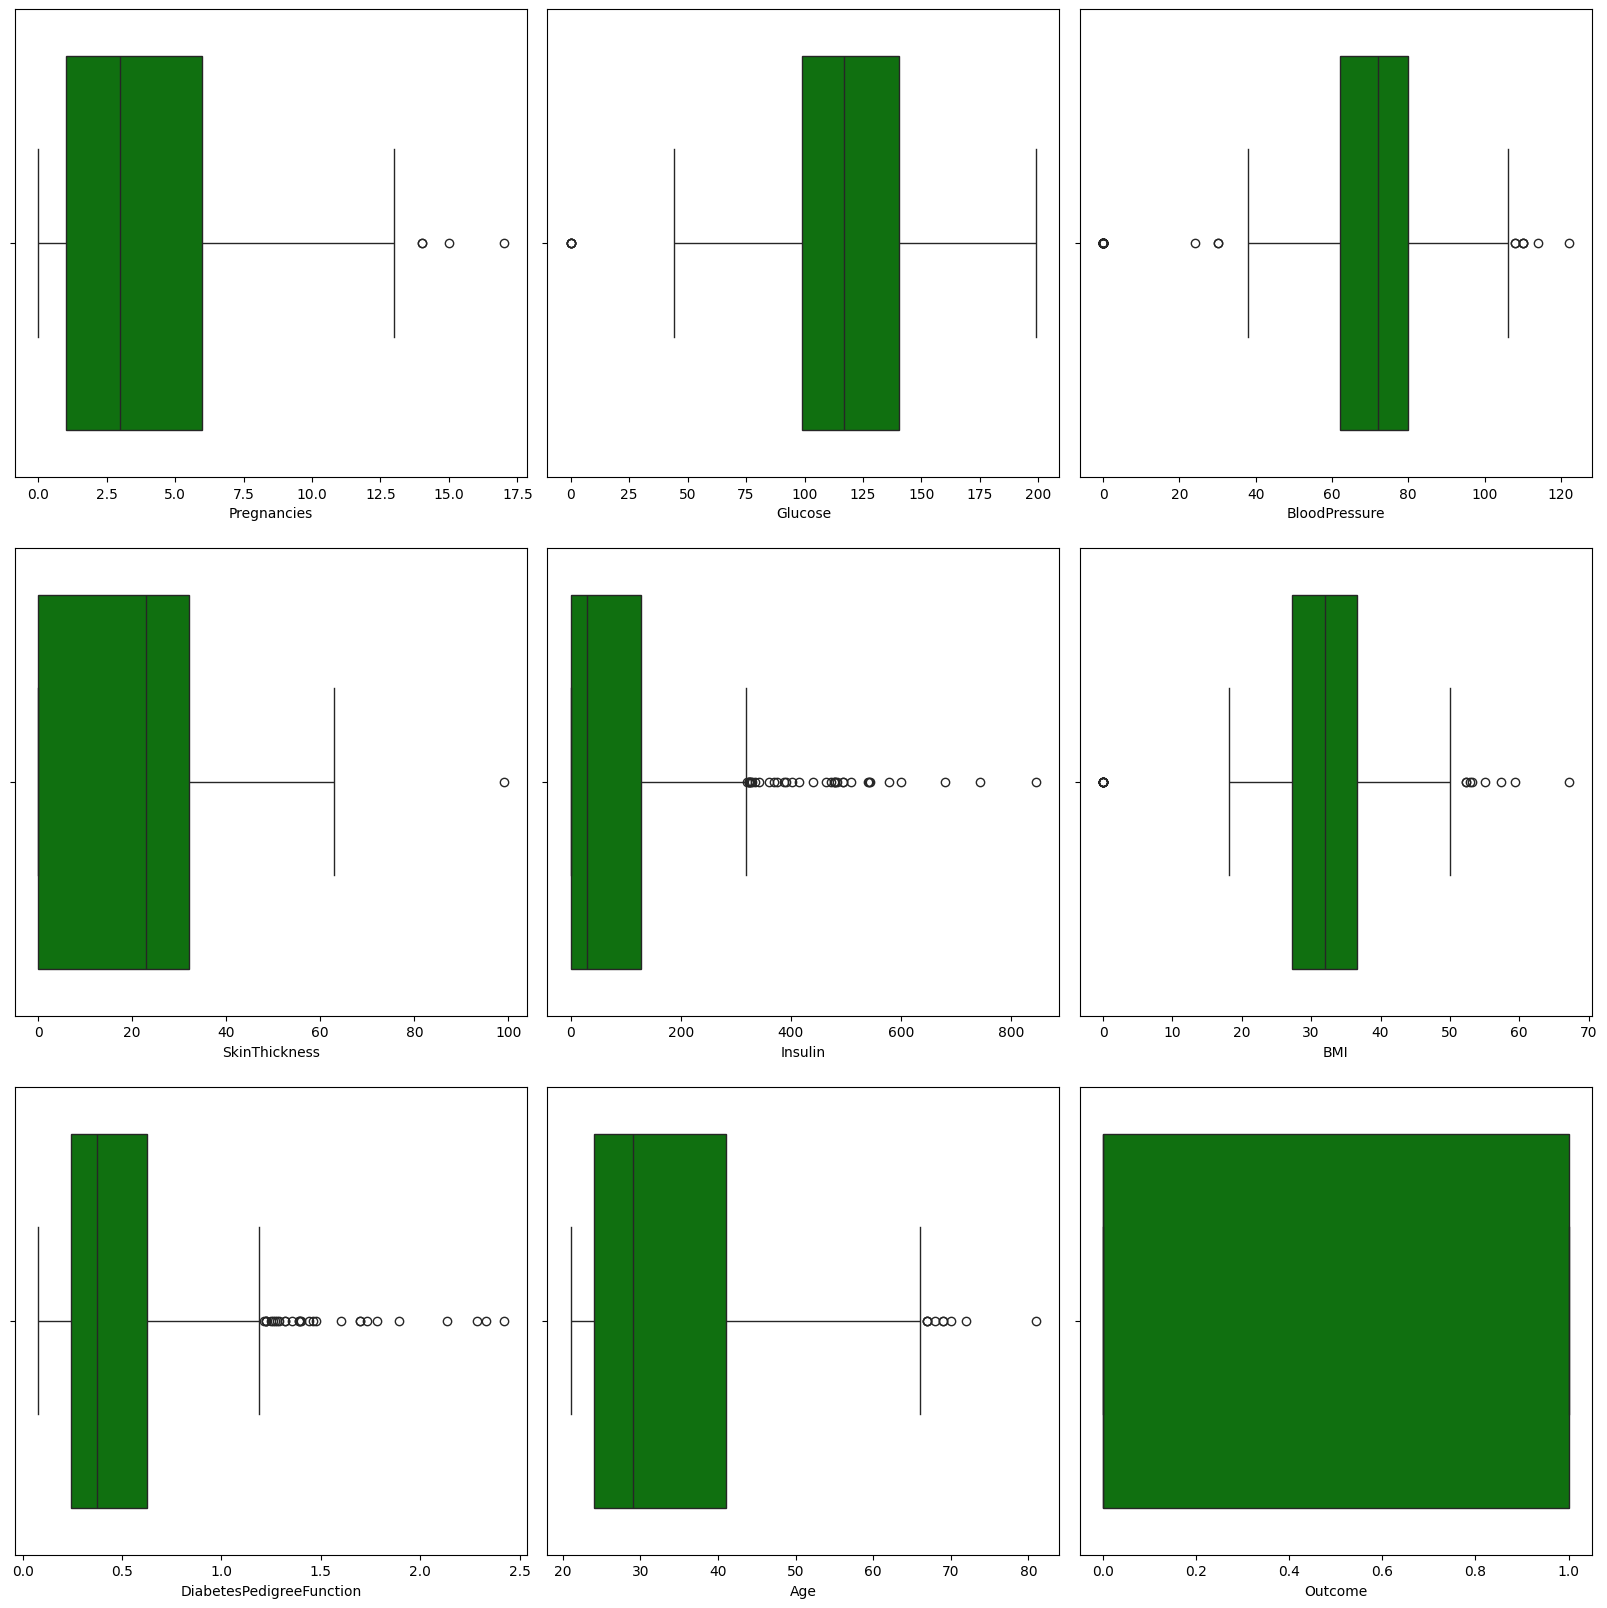

In [9]:
' Box plot '
fig = plt.figure(figsize=(16,16))
temp = df.columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=item, color='green')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

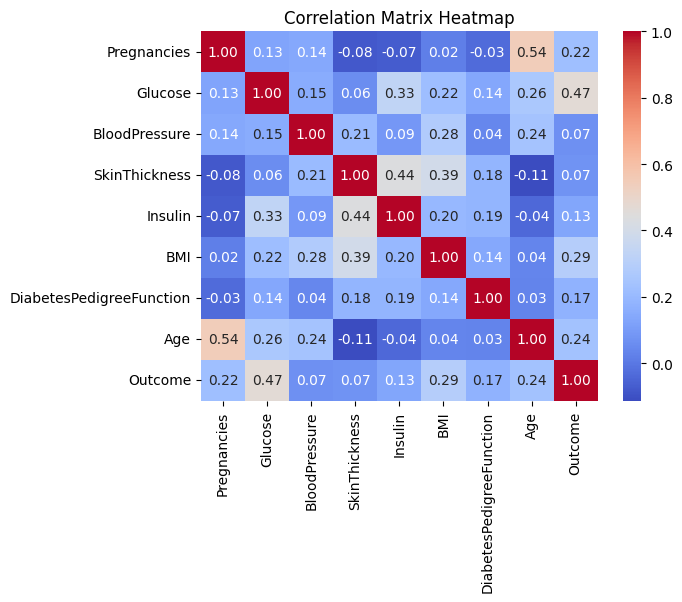

In [10]:
' Heat map'
corr_matrix = df.corr()

# Set up the matplotlib figure
# plt.figure(figsize=(20, 16))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [18]:
scaler = MinMaxScaler()
columns = df.columns
df = pd.DataFrame(scaler.fit_transform(df))
df.columns = columns
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [19]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [21]:
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
lr=LogisticRegression()
xg = XGBClassifier()
svm = SVC()



In [22]:
'RF '
print ('Random Forest model : ')
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print ('Train : ', accuracy_score(y_train,rf.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_rf))

Random Forest model : 
Train :  1.0
Test :  0.7662337662337663


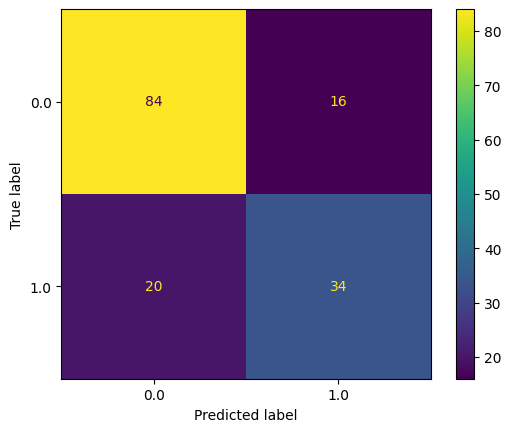

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

plt.show()

Logistic regression model : 
Train :  0.7850162866449512
Test :  0.7337662337662337


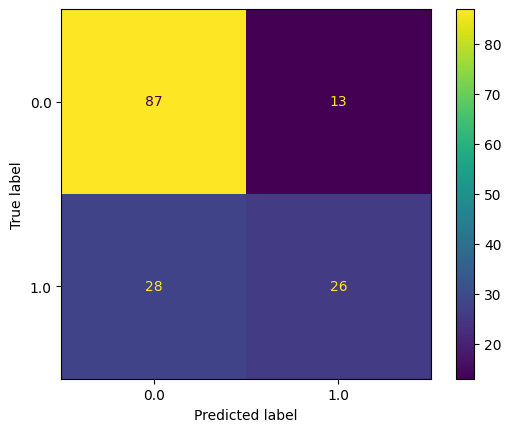

In [26]:
'Logistic '
print ('Logistic regression model : ')
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print ('Train : ', accuracy_score(y_train,lr.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_lr))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

plt.show()

Decision Tree model : 
Train :  1.0
Test :  0.7337662337662337


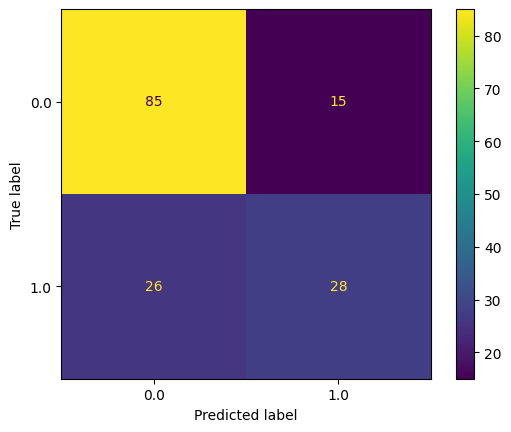

In [27]:
'DT '
print ('Decision Tree model : ')
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print ('Train : ', accuracy_score(y_train,dt.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_dt))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)

plt.show()

XGboost model : 
Train :  1.0
Test :  0.7467532467532467


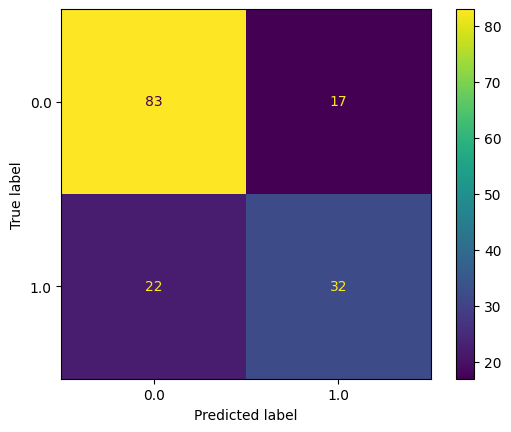

In [31]:
print ('XGboost model : ')
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
print ('Train : ', accuracy_score(y_train,xg.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_xg))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xg)

plt.show()

SVM model : 
Train :  0.8159609120521173
Test :  0.7467532467532467


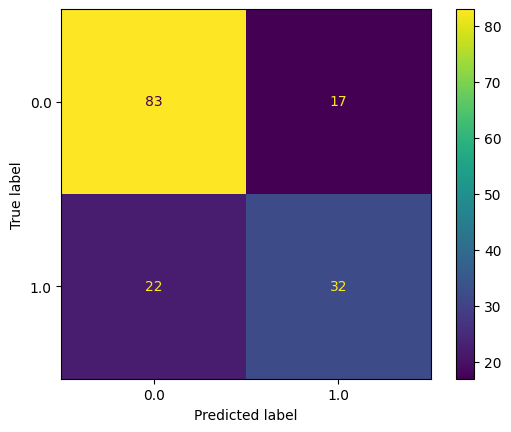

In [33]:
print ('SVM model : ')
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)
print ('Train : ', accuracy_score(y_train,svm.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_svm))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

plt.show()

Text(0.5, 1.0, 'Accurancy of each model')

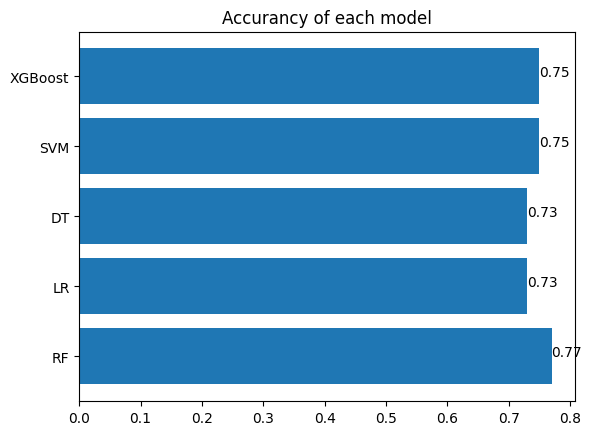

In [35]:
X = ['RF', 'LR', 'DT', 'SVM', 'XGBoost']
y = [accuracy_score(y_test,y_pred_rf), accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_dt), accuracy_score(y_test,y_pred_svm), accuracy_score(y_test,y_pred_xg)]

y_ = [round(num, 2) for num in y]
plt.barh (X, y_)

for index, value in enumerate(y_):
    plt.text(value, index,
             str(value))
plt.title('Accurancy of each model')